# Question 1 Gradient Discent

In [5]:
import numpy as np
import math
import pylab as pl
import random

%matplotlib inline

In [6]:
def negativeGaussian(x,mu,Sigma):
    detSigma = np.linalg.det(Sigma)
    n = len(x)
    NC = -((1/(np.sqrt(2*math.pi)**2)*detSigma)) # normalizing constant
    normalizedX = [a - b for a, b in zip(x, mu)] 
    invSigma = np.linalg.inv(Sigma)
    kernel = np.exp(-0.5*(np.inner(np.inner(normalizedX,invSigma),np.transpose(normalizedX))))
    
    value = -NC*kernel
    
    gradient = -value*np.inner(invSigma,normalizedX)
    
    return(value,gradient)
    

In [7]:
def qBowl(x,b,A):
    value = 0.5*np.inner(np.inner(np.transpose(x),A),x) - np.inner(np.transpose(x),b)
    gradient = np.inner(A,x) - b
    return (value,gradient)

In [8]:
a = [25,25]
mu = [1,3.2]
A = [[2,0.3],[0.4,3]]

In [9]:
qBowl(a,mu,A)

(1676.25, array([ 56.5,  81.8]))

In [10]:
0.5*np.inner(np.inner(np.transpose(a),A),a) - np.inner(np.transpose(a),mu)

1676.25

In [11]:
def batchGradientDiscent(function,initGuess,step,threshold,maxIter,*args):
    gradientNorm = []
    epsilon = 1
    value = initGuess
    iteration = 0
    #while iteration > 1:
    #if iteration < maxIter:
    while epsilon > threshold and iteration < maxIter : 
       
        output = function(initGuess,*args)
        #print output
        
        gradient = output[1]
        newValue = value - step * gradient #GDS equation
        
        evaluateOld = function(value,*args)[0] # function evaluated at old point
        #print(evaluateOld)
        evaluateNew = function(newValue,*args)[0]# function evaluated at new point
        #print(evaluateNew)
        epsilon = abs(evaluateNew - evaluateOld)
        value = newValue
        gradient= function(value,*args)[1]
        gNorm = np.linalg.norm(gradient)
        gradientNorm .append(gNorm)
        print epsilon
            

        iteration+=1
        print(iteration)
          
        
        
    return(gradientNorm)

In [12]:
# Loading the parameters
def getData():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('../DataFiles/HW1/parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 



In [13]:
gaussMean,gaussCov,quadBowlA,quadBowlb = getData()

In [14]:
qBowl(a,quadBowlb,quadBowlA)

(-10625.0, array([-25., -25.]))

In [15]:
quadBowlb

array([ 400.,  400.])

In [16]:
np.inner(np.linalg.inv(quadBowlA),quadBowlb)

array([ 26.66666667,  26.66666667])

In [211]:
batchGradientDiscent(negativeGaussian,[20,10],0.01,1e-19,100,gaussMean,gaussCov)

35358.505416
1
45316.6173209
2
36446.4295462
3
21064.632288
4
9159.82977184
5
3060.79533518
6
795.005747386
7
161.615373185
8
25.8281979881
9
3.2546552102
10
0.324061714159
11
0.0255340935816
12
0.0015939254265
13
7.88920894695e-05
14
3.09807686636e-06
15
9.6572865315e-08
16
2.39047981131e-09
17
4.7001158677e-11
18
7.34216766292e-13
19
9.1140128913e-15
20
8.9913599767e-17
21
7.05049220509e-19
22
4.39470371397e-21
23


[2917.0210066242635,
 2848.4097399899583,
 1899.2427880139996,
 931.82567341155357,
 346.8006574783667,
 99.429589617843206,
 22.156966595003993,
 3.8592344609212286,
 0.52737973207221989,
 0.056692765775181071,
 0.0048034589382572037,
 0.00032124412909016444,
 1.6976922248855268e-05,
 7.0959370667599824e-07,
 2.3474469691877673e-08,
 6.1498988541811826e-10,
 1.276536669750541e-11,
 2.1002186670023338e-13,
 2.7397271549355163e-15,
 2.8345601700232616e-17,
 2.3265157968361774e-19,
 1.5151661879627787e-21,
 7.8312038918676794e-24]

In [193]:
print quadBowlA
print quadBowlb

[[ 10.   5.]
 [  5.  10.]]
[ 400.  400.]


In [192]:
A = qBowl([20,0],quadBowlb,quadBowlA)[0]
B = qBowl([20,0],quadBowlb,quadBowlA)[1]
C = B*0.01
print [20,0] - C
qBowl([22,3],quadBowlb,quadBowlA)[0]

[ 22.   3.]


-7205.0

In [199]:
batchGradientDiscent(qBowl,[26,26],0.001,1e-1,10,quadBowlb,quadBowlA)

-10660.0
-10660.1985
0.198499999999
1
-10660.1985
-10660.394
0.195500000002
2
-10660.394
-10660.5865
0.192499999999
3
-10660.5865
-10660.776
0.189499999999
4
-10660.776
-10660.9625
0.186500000003
5
-10660.9625
-10661.146
0.183499999999
6
-10661.146
-10661.3265
0.180499999997
7
-10661.3265
-10661.504
0.177500000005
8
-10661.504
-10661.6785
0.174499999996
9
-10661.6785
-10661.85
0.1715
10


[13.930003589374937,
 13.717871555018926,
 13.505739520662912,
 13.2936074863069,
 13.081475451950968,
 12.869343417595037,
 12.657211383238943,
 12.445079348883011,
 12.232947314526918,
 12.020815280170986]

Quadratic bowl shows some very erratic behavior unless the startiing point is very clos
and the threshold is relatively larger

## Question 2

In [ ]:
def finiteDifference(function,sp,h,*args):

    fdApprox = []
    for i in range(len(sp)):
        Lower = [float(j) for j in sp]
        Higher = [float(j) for j in sp]
        Lower[i] = Lower[i] - 0.5*h
        #print Lower
        Higher[i] = Higher[i] + 0.5*h
        print Lower
        print Higher
        higherValue = function(Higher,*args)[0]
        lowerValue = function(Lower,*args)[0]
        print higherValue
        print lowerValue
        fdApprox.append((higherValue - lowerValue)/h)
        #increment = [0.5*h + b for  b in sp]
        #higherInput = [a + b for a, b in zip(sp, increment)] 
        #lowerInput = [a - b for a, b in zip(sp, increment)]
        #higher = function( higherInput,*args)[0]
        #lower = function(lowerInput,*args)[0]
        #fdApprox = (higher - lower)/h
    return(fdApprox)


In [ ]:
finiteDifference(qBowl,[1,2],10000,quadBowlb,quadBowlA)

In [ ]:
qBowl([1,2],quadBowlb,quadBowlA)

In [ ]:
A = [32,23]
A[1] = A[1]+23
A
[float(i) for i in A]

In [ ]:
A = [2,3]
B = [23,4]
[0.5 + b for  b in A] 


# # Data for SGD

In [170]:
# Loading the data

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('../DataFiles/HW1/fittingdatap1_x.txt')
    y = pl.loadtxt('../DataFiles/HW1/fittingdatap1_y.txt')

    return (X,y) 

In [171]:
X,y = getData()

In [259]:
A = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))

In [260]:
sp = np.inner(A,y)
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

Least Square function

In [261]:
def leastSquare(theta,X,y):
    y = y.ravel()
    intermediate = np.inner(X,theta) - y
    value = np.inner(np.transpose(intermediate),intermediate)
    gradient = 2*np.inner(np.transpose(X),intermediate)
        
    return(value,gradient)


In [262]:
theta = [1,2,3,4,-5,6,7,8,9,-10]

In [263]:
#leastSquare(sp,X[1,],y[1])[1]

In [264]:
print np.linalg.norm((leastSquare(sp,X,y)[1]))
print leastSquare(sp,X,y)[1]

8.08898029578e-10
[  7.22795585e-11   3.46213943e-11   7.47740492e-11  -3.55712868e-11
   2.15244461e-11  -1.43022159e-10   8.23569515e-12   6.10197803e-11
  -6.08653302e-10  -4.95850632e-10]


In [265]:
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [266]:
batchGradientDiscent(leastSquare,sp,0.01,1e-19,36,X,y)

1.09139364213e-11
1
7.27595761418e-12
2
1.27329258248e-11
3
2.0008883439e-11
4
1.27329258248e-11
5
1.81898940355e-12
6
1.63709046319e-11
7
1.81898940355e-12
8
1.09139364213e-11
9
1.81898940355e-12
10
3.63797880709e-12
11
5.45696821064e-12
12
0.0
13


[7.9660930842840948e-07,
 1.594041477882827e-06,
 2.3914663574340702e-06,
 3.1888408460146198e-06,
 3.9862837026355625e-06,
 4.7837352369274375e-06,
 5.5811240962023485e-06,
 6.3785109611052526e-06,
 7.1759815794085644e-06,
 7.973326024409016e-06,
 8.7707841814722048e-06,
 9.5681764813319139e-06,
 1.0365626566432998e-05]

# Stochastic Gradient Discent

In [277]:
def stochasticGradientDiscent(X,Y,initGuess,threshold,maxIter,tau0,kappa):
    gradientNorm = []
    epsilon = 1
    value = initGuess
    iteration = 0

    n = X.shape[0]
    indTheta = initGuess
    k = kappa
    steps = 0
    
    while epsilon > threshold :
        for j in range(maxIter):
            for i in range(n):
            
                indX = X[i,]
                print indX
                indY = Y[i]
                y = indY.ravel()
                intermediate = np.inner(indX,indTheta) - y
                print intermediate
                #print intermediate
                value = np.inner(np.transpose(intermediate),intermediate)
                gradient = 2*np.transpose(indX)*intermediate
                #value = (np.inner(np.transpose(indX),indTheta) - indY)**2
                #print(value)
                print gradient
                #gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
                #print(np.linalg.norm(gradient))
                #print tau0
                etaT = (1./(tau0+steps))**k
                #print etaT
                newTheta = indTheta - etaT*gradient
                newIntermediate = np.inner(indX,newTheta) - y
                
                newValue = np.inner(np.transpose(newIntermediate),newIntermediate)
                #print(newValue)
                epsilon = abs(newValue - value)
                #epsilon = np.linalg.norm(gradient)
                #print(epsilon)
                #print(newTheta)
                #print(indTheta)
                steps=+1            
                indTheta = newTheta
                #print(indTheta)
                
        #return(indTheta)

In [278]:
sp


array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

In [279]:
stochasticGradientDiscent(X,y,sp,0.1,3,2,0.7)

[ -0.1472   0.4902 -22.6757  14.7657  10.7925 -17.3419  -7.5815 -16.5327
  -6.7174   2.7522]
[ 5.4970704]
[  -1.61833753    5.38932782 -249.29983863  162.33618487  118.65426463
 -190.65929041  -83.35207851 -181.76283167  -73.85204144   30.25807432]
[ -2.66000000e-02  -3.50944000e+01  -3.24594000e+01   4.04050000e+00
  -2.68454000e+01  -1.55490000e+01   1.36408000e+01  -5.82570000e+00
  -1.99688000e+01   2.02079000e+01]
[-6384.59926778]
[  3.39660681e+02   4.48127361e+05   4.14480523e+05  -5.15939467e+04
   3.42794242e+05   1.98548268e+05  -1.74182083e+05   7.43895199e+04
   2.54985572e+05  -2.58038687e+05]
[  8.571   28.3335  -0.26    16.7877   7.9738  25.0168 -16.2684  64.9319
  37.4096   4.1401]
[-16472579.71758101]
[ -2.82372962e+08  -9.33451675e+08   8.56574145e+06  -5.53073453e+08
  -2.62698112e+08  -8.24182465e+08   5.35965032e+08  -2.13919180e+09
  -1.23246524e+09  -1.36396255e+08]
[ -9.3365  14.6148  15.3803  -8.95    13.3843  11.7449  -0.2259  43.7849
 -21.8766  -2.062 ]
[  3.

/Users/Divy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in double_scalars



[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[-11.8296   0.2642 -15.6819  13.3063  29.8638  20.7015 -10.6472 -22.7998
 -17.3796  14.9963]
[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 54.0959 -21.68   -11.7247  50.1375  32.114   24.1673  19.4607  22.9573
  17.1462   0.5994]
[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[-22.2642 -17.2049  -4.4208 -27.8806  -6.3342  28.3959 -10.692  -34.0589
 -41.3932 -12.2583]
[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[  5.4492   6.7739 -45.9202   1.1863   8.4924  -3.9101 -37.1721   0.8257
  -4.0884  18.3646]
[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 31.2569  12.8812  16.0071 -18.5466 -15.4173 -35.087   27.5831  -0.5816
  12.4878 -14.6787]
[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ -8.7835  -2.7698  -4.6837  11.2956   3.6084 -10.6735   6.8236  24.0313
 -24.1411  31.0233]
[ nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[-36.9215   2.8567 -32.8159 

In [229]:
i = 1
indTheta = sp
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),indTheta) - indY)**2
gradient = 2*(np.inner(np.transpose(indX),indTheta) - indY)*indX
#print value,gradient
#print np.linalg.norm(gradient)
tau0 = 2
k = 0.8
j = 1
etaT = (1./(tau0+(j+1)))**k
print etaT
newTheta = indTheta - etaT*gradient
#print gradient
#print etaT*gradient
print newTheta
print np.inner(np.transpose(indX),indTheta) - indY
#2*(np.inner(np.transpose(indX),newTheta) - indY)*indX

0.329876977693
[  2.27496097e-01  -3.66154899e+02  -3.42818175e+02   4.86995266e+01
  -2.79365403e+02  -1.54519334e+02   1.44823824e+02  -6.08498480e+01
  -2.19959331e+02   2.25225007e+02]
-15.7131943321


In [230]:
sp

array([  0.5032541 ,  -2.3367948 ,  -6.31670032,   6.81230107,
        -1.06337989,   6.67469398,   3.4118044 ,  -0.45573592,
       -12.94593466,  15.73289812])

[ 5.4970704]
30.2177830051
[  -1.61833753    5.38932782 -249.29983863  162.33618487  118.65426463
 -190.65929041  -83.35207851 -181.76283167  -73.85204144   30.25807432]
[-6384.59926778]
40763107.8102
[  3.39660681e+02   4.48127361e+05   4.14480523e+05  -5.15939467e+04
   3.42794242e+05   1.98548268e+05  -1.74182083e+05   7.43895199e+04
   2.54985572e+05  -2.58038687e+05]
[-16472579.717581]
2.71345882552e+14
[ -2.82372962e+08  -9.33451675e+08   8.56574145e+06  -5.53073453e+08
  -2.62698112e+08  -8.24182465e+08   5.35965032e+08  -2.13919180e+09
  -1.23246524e+09  -1.36396255e+08]
[  3.96925950e+10]
1.57550209685e+21
[ -7.41179826e+11   1.16019867e+12   1.22096804e+12  -7.10497450e+11
   1.06251520e+12   9.32371118e+11  -1.79331144e+10   3.47587260e+12
  -1.73667805e+12  -1.63692262e+11]
[  1.65027897e+13]
2.7234206697e+26
[ -3.54238981e+14  -3.46789622e+14  -3.56839821e+14  -7.56081910e+14
  -2.12318291e+14  -1.93647035e+14  -5.44677874e+14  -6.17894150e+14
  -7.96325613e+14  -1.2883727

In [122]:
sp

array([-41.31766813,  -0.82708803,  -7.06071553,  34.42502081,
       -30.18680803,  -0.67330762,  15.95421946,   3.48234334,
         6.73856983, -15.40532608])

In [ ]:
indX = X[i,]
indY = y[i]
value = (np.inner(np.transpose(indX),sp) - indY)**2
value
2*(np.inner(np.transpose(indX),sp) - indY)*indX

In [ ]:
def additional(function,f,d,*args):
    return(function(*args)+f**d)


In [ ]:
add(23,31)

In [ ]:
additional(mult,23,2,12,3)

In [ ]:
23**2

In [ ]:
abs(23-132)

In [ ]:
 x = np.arange(30).reshape(6,5)

In [ ]:
x[:,1]

In [ ]:
data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

## Linear Basis Function Regression

In [124]:
# Data for question 2
import matplotlib.pyplot as plt
import pylab as pl

def getData(ifPlotData=True):
    # load the fitting data and (optionally) plot out for examination
    # return the X and Y as a tuple

    data = pl.loadtxt('../DataFiles/HW1/curvefittingp2.txt')

    X = data[0,:]
    Y = data[1,:]

    if ifPlotData:
        plt.plot(X,Y,'o')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return (X,Y)

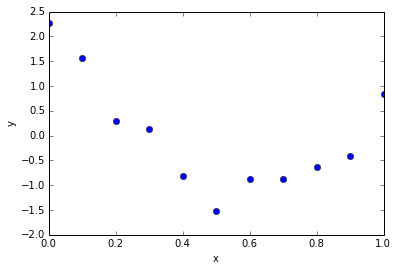

In [125]:
X,Y = getData(ifPlotData=True)


In [228]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [229]:
def LBFRegression(X,y,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)

In [ ]:
fValue18 = LBFRegression(X,Y,18)[1]

In [ ]:
plt.plot(X,fValue18,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
designMat = np.zeros((5,3))

In [ ]:
designMat[1,:] = A
designMat[2,:] = [a**2 for a in A] 
designMat[3,:] = [a**3 for a in A] 

In [ ]:
designMat


# Cosine basis function

In [ ]:
def CosBFRegression(X,y,m):
    designMat = np.zeros((len(X),m))
    for i in range(1,m+1):
        
        #print np.cos(i*np.pi*X)
        designMat[:,i-1] = np.cos(i*np.pi*X)
        
        
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle)

In [ ]:
CosBFRegression(X,Y,8)

In [ ]:
np.cos(4*np.pi*X)

# Ridge Regression 

In [11]:
# Data for question 3

import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def regressAData():
    return getData('../DataFiles/HW1/regressA_train.txt')

def regressBData():
    return getData('../DataFiles/HW1/regressB_train.txt')

def validateData():
    return getData('../DataFiles/HW1/regress_validate.txt')

In [12]:
regressAData()[0]

array([[ 1.29946363],
       [-0.80608991],
       [ 0.7569518 ],
       [-2.62790749],
       [-1.50589984],
       [-2.83632079],
       [-2.72378643],
       [ 1.13817614],
       [-1.23794415],
       [-1.40714309],
       [ 2.40714309],
       [ 2.30714309],
       [ 0.90714309]])

In [17]:
def ridgeRegression(X,y,lambdaShrink,m):
    designMat = np.zeros((len(X),m+1))
    for i in range(m+1):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
        
    y = y.ravel() 
    
    yCentered = [j - np.mean(y) for j in y] # Centering y's
    
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m+1)),np.transpose(designMat)),yCentered)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

Test 1

In [18]:
Train1_X = regressAData()[0]
Train1_Y = regressAData()[1]
Test1_X = regressBData()[0]
Test1_Y = regressBData()[1]
valid1_X =validateData()[0]
valid1_Y = validateData()[1]

In [19]:
ridgeParam

NameError: name 'ridgeParam' is not defined

In [33]:
def LBFRidgeRegression(theta,X,y,lambda_shrinkage):
    params = len(theta)
    #print (m)
    designMat = np.zeros((len(X),params))
    for i in range(params):
        #print([a**i for a in X])
        designMat[:,i] = [a**i for a in X]
        designMat[:,i] = [j - np.mean(y) for j in designMat[:,i]] # Centering X's
    
    y = y.ravel() 
    yCentered = [j - np.mean(y) for j in y]  # Centering y's
    
    
    fittedValues = np.dot(designMat,np.transpose(theta))
    fittedDifference = [a - b for a, b in zip(fittedValues,yCentered)]
    RSS = sum(a**2 for a in fittedDifference)+lambda_shrinkage*np.dot(theta,np.transpose(theta))
    return(fittedValues,RSS)

In [38]:
ridgeParam = ridgeRegression(Train1_X,Train1_Y,0.6,5)[0]
LBFRidgeRegression(ridgeParam,valid1_X ,valid1_Y,15)
#ridgeParam

(array([ 1.79407114,  0.90137955, -1.34963976, -1.92571202,  0.12248468,
        -0.23195515, -1.76788164, -1.48869352, -1.30998562, -1.3324572 ,
        -2.13197573, -0.69506116, -0.20151477, -2.93539211,  0.19682816,
        -1.46914259,  0.82750859,  1.10991989,  1.34064851, -2.08221341,
         1.48949314,  1.65475167]), 35.598423331853681)

Test 2

In [245]:
Train1_X = regressBData()[0]
Train1_Y = regressBData()[1]
Test1_X = regressAData()[0]
Test1_Y = regressAData()[1]

In [256]:
ridgeParam = ridgeRegression(Train1_X,Train1_Y,0.6,10)[0]

In [257]:
LBFRidgeRegression(ridgeParam,Test1_X ,Test1_Y)

(array([  2.14770993,   0.18476991,   1.72257668,   5.33057413,
         -2.19399598,  26.11913085,  12.81365765,   2.12672868,
         -0.92511617,  -1.66875885,  48.19063043,  29.48151876,   1.91391144]),
 248.96639489346109)

# Question 4 (Sparsity and LASSO)

In [3]:
# Data for this question
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def lassoTrainData():
    return getData('../DataFiles/HW1/lasso_train.txt')

def lassoValData():
    return getData('../DataFiles/HW1/lasso_validate.txt')

def lassoTestData():
    return getData('../DataFiles/HW1/lasso_test.txt')


In [4]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1,fit_intercept=False) # alpha is the shrinkage parameter
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)
print(clf.intercept_)


[ 0.94  0.  ]
0.0


In [306]:

def sineBasisFunction(X,y,n=13):
    designMat = np.zeros((len(X),n))
    designMat[:,0] = X.ravel()
    for i in range(1,n):
        #print([a**i for a in X])
        designMat[:,i] = [np.sin(0.4*np.pi*a*i) for a in X]
    return(designMat,y)

In [5]:
X = lassoTrainData()[0]
y = lassoTrainData()[1]

In [309]:
designMat = sineBasisFunction(X,y,n=13)[0]
outcome = sineBasisFunction(X,y,n=13)[1]

In [310]:
clf.fit(designMat, outcome)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [311]:
print(clf.coef_)

[ 0.          0.          5.49526681  0.33802335  0.          1.12455954
  2.28295397  0.          0.         -0.         -0.          0.          0.        ]


In [320]:
def ridgeRegressionGeneral(X,y,lambdaShrink):
    designMat = X
    m = X.shape[1]
    y = y.ravel() 
    mle = np.inner(np.dot(np.linalg.inv(np.dot(np.transpose(designMat),designMat)+lambdaShrink*np.identity(m)),np.transpose(designMat)),y)
    fittedValues = np.dot(designMat,np.transpose(mle))
    return(mle,fittedValues)
    

In [323]:
ridgeRegressionGeneral(designMat,y,7)

(array([ 0.78892831,  0.8659637 ,  1.14612021,  0.86954421,  0.56026403,
         0.56512953,  0.68207974,  0.52355505,  0.09691978, -0.17692136,
        -0.03052377,  0.25532703,  0.17543088]),
 array([-3.69000726, -1.37665884,  2.7225307 ,  3.66210977, -2.49720775]))

In [318]:
X.shape[1]

1

In [3]:
A = [2,3,2,3]
a = 4
[b - a for b in A]

[-2, -1, -2, -1]

In [7]:
np.mean(A)

2.5